# Explore here

It's recommended to use this notebook for exploration purposes.

For example: 

1. You could import the CSV generated by python into your notebook and explore it.
2. You could connect to your database using `pandas.read_sql` from this notebook and explore it.

In [3]:
# Example reading the SQL database from here
# from dotenv import load_dotenv
# from sqlalchemy import create_engine
# import pandas as pd
import os
import requests 
import tweepy
import pandas as pd 
from dotenv import load_dotenv

# # load the .env file variables
# load_dotenv()

# connection_string = f"mysql+pymysql://{os.getenv('DB_USER')}:{os.getenv('DB_PASSWORD')}@{os.getenv('DB_HOST')}/{os.getenv('DB_NAME')}?autocommit=true"
# engine = create_engine(connection_string)
# engine.connect()

# dataframe = pd.read_sql("Select * from books;", engine)
# print(dataframe.describe())

In [4]:
# # load the .env file variables
# load_dotenv()
load_dotenv()

#consumer_key = os.env.get("CONSUMER_KEY")
#consumer_secret = os.env.get("CONSUMER_SECRET")
#bearer_token= os.env.get("BEARER_TOKEN")

consumer_key = "SgzyNRayEzRCOP3CvWvuWGck3" 
consumer_secret = "sfrTztYnTg8gyAx1Z5Z5JKgA0Ru8BztOa9ZDYD5CKZUYimaSnG"
bearer_token = "AAAAAAAAAAAAAAAAAAAAAB6%2FdwEAAAAA1MmgS8K4455DZD6CSu%2B9Jnm82Nk%3D0cPOgSVpOvqZ1EbqZEGuwS32j7P2gZB0peGvzVEjHWqMufD73y"

# Creando cliente de Twitter

client = tweepy.Client( bearer_token=bearer_token, 
                        consumer_key=consumer_key, 
                        consumer_secret=consumer_secret,
                        return_type = requests.Response,
                        wait_on_rate_limit=True)


# Definiendo el query para Tweeter

query = '#100daysofcode (pandas OR python) -is:retweet'      

tweets = client.search_recent_tweets(query=query, 
                                    tweet_fields=['author_id','created_at','lang'],
                                     max_results=100)





In [5]:
tweets

<Response [200]>

## Convert to pandas Dataframe

In [6]:
# Save data as dictionary
tweets_dict = tweets.json()
list(tweets_dict)

['data', 'meta']

In [7]:
# Extract "data" value from dictionary
tweets_data = tweets_dict['data'] 
tweets_data

[{'text': 'Pay us to do or write your \n#Assignments \n#calculus \n#homework\n#Homeworkhelp \n#summerclasses \n#Onlineclass \n#essayhelp \n#Essaydue \n#essaywrite \n#Essays\n#Music\n#Art\n#Law \n#Javascript\n#Python\n#Programming\n#CodeNewbies \n#100daysofcode\n#webdevelopment \n#Datascience\nDm us now for help https://t.co/7nkhCr5ejv',
  'lang': 'en',
  'id': '1539416720540065794',
  'created_at': '2022-06-22T01:15:21.000Z',
  'author_id': '1524278963689951235'},
 {'text': 'We offer Legit &amp; Quality academic solutions.\nKindly dm to place your order;\n #essaypay \n#Econometrics\n#javascript\n#WomenWhoCode\n#English \n#Assignmentpay\n#100DaysOfCode\n#Python\n#NodeJS\n#Biology\n#Math\n#Essaydue\n#homeworkslave\n#OnlineClasses\n#coding\n#psychology \n+1(251)440-3310\n DM https://t.co/IqK999YS3u',
  'lang': 'en',
  'id': '1539416630127648770',
  'created_at': '2022-06-22T01:15:00.000Z',
  'author_id': '1275077097908658177'},
 {'text': "Day38  #100DaysOfCode #Python\n\nToday I studied a

In [8]:
list(tweets_data[1])

['text', 'lang', 'id', 'created_at', 'author_id']

In [9]:
# Transform to pandas Dataframe
df_twets = pd.json_normalize(tweets_data)
df_twets # look dataframe

,text,lang,id,created_at,author_id
0,Pay us to do or write your \n#Assignments \n#c...,en,1539416720540065794,2022-06-22T01:15:21.000Z,1524278963689951235
1,We offer Legit &amp; Quality academic solution...,en,1539416630127648770,2022-06-22T01:15:00.000Z,1275077097908658177
2,Day38 #100DaysOfCode #Python\n\nToday I studi...,en,1539416073333710849,2022-06-22T01:12:47.000Z,1211446433309581312
3,"Hello, kindly send us details of your assignme...",en,1539415958804123653,2022-06-22T01:12:20.000Z,1275077097908658177
4,"""A man with outward courage dares to die: a ma...",en,1539415488303972353,2022-06-22T01:10:28.000Z,1243665419501744133
...,...,...,...,...,...
95,Hire us to handle:\n#Assignments \nAccounting\...,en,1539404657478574080,2022-06-22T00:27:25.000Z,1499685033849901056
96,What complaint do you have??\nSystem Hacked?\n...,en,1539403749583642625,2022-06-22T00:23:49.000Z,3117927641
97,media technical\nissues and assistances contac...,en,1539403697624698880,2022-06-22T00:23:36.000Z,3117927641
98,Social media technical\nissues and assistances...,en,1539403645808164864,2022-06-22T00:23:24.000Z,3117927641


In [10]:
# save df
df_twets.to_csv("coding-tweets.csv")

In [11]:
df_twets.head(5)

,text,lang,id,created_at,author_id
0,Pay us to do or write your \n#Assignments \n#c...,en,1539416720540065794,2022-06-22T01:15:21.000Z,1524278963689951235
1,We offer Legit &amp; Quality academic solution...,en,1539416630127648770,2022-06-22T01:15:00.000Z,1275077097908658177
2,Day38 #100DaysOfCode #Python\n\nToday I studi...,en,1539416073333710849,2022-06-22T01:12:47.000Z,1211446433309581312
3,"Hello, kindly send us details of your assignme...",en,1539415958804123653,2022-06-22T01:12:20.000Z,1275077097908658177
4,"""A man with outward courage dares to die: a ma...",en,1539415488303972353,2022-06-22T01:10:28.000Z,1243665419501744133


In [12]:
# analizando texto ahora vamos a contar cuantos Twetts tienen la palabra 'python' y 'pandas':

#import re
import re

#define your function here
def word_in_text(word, text):
    word = word.lower()
    text = text.lower()
    match = re.search(word, text)

    if match:
        return True
    return False 

In [13]:
# Initialize list to store tweet counts
[pandas, python] = [0, 0]

# Iterate through df, counting the number of tweets in which each(pandas and python) is mentioned.
for index, row in df_twets.iterrows():
    pandas += word_in_text('pandas', row['text'])
    python += word_in_text('python', row['text'])

In [14]:
print(type(df_twets))

<class 'pandas.core.frame.DataFrame'>


In [15]:
print(type(pandas))

<class 'int'>


/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


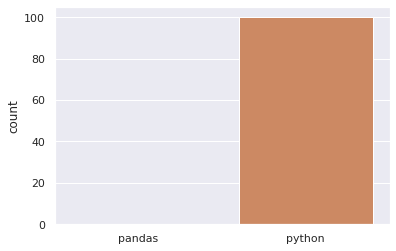

In [18]:
# Visualización 
# Import packages
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set(color_codes=True)

# Create a list of labels:cd
cd = ['pandas', 'python']

# Plot the bar chart
ax = sns.barplot(cd, [pandas, python])
ax.set(ylabel="count")
plt.show()